In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('brain_stroke.csv')

In [3]:
df.shape

(4981, 11)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
248/(248+4733)

0.049789198956032926

In [6]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [7]:
df['hypertension'].value_counts()

0    4502
1     479
Name: hypertension, dtype: int64

In [8]:
df['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [9]:
df['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [10]:
df['avg_glucose_level'].min()

55.12

In [11]:
df['bmi'].max()

48.9

In [12]:
df.groupby(['gender'])['stroke'].value_counts().to_frame()

stroke
gender stroke        
Female 0         2767
       1          140
Male   0         1966
       1          108

In [13]:
df.groupby(['smoking_status'])['stroke'].value_counts().to_frame()

stroke
smoking_status  stroke        
Unknown         0         1453
                1           47
formerly smoked 0          797
                1           70
never smoked    0         1749
                1           89
smokes          0          734
                1           42

In [14]:
df.groupby(['ever_married'])['stroke'].value_counts().to_frame()

stroke
ever_married stroke        
No           0         1672
             1           29
Yes          0         3061
             1          219

In [15]:
# Rata-rata bmi dari stroke dan tidak stroke
df.groupby(['stroke'])['bmi'].mean()

stroke
0    28.409698
1    30.186694
Name: bmi, dtype: float64

In [16]:
# Rata-rata kadar gula dari stroke dan tidak stroke
df.groupby(['stroke'])['avg_glucose_level'].mean()

stroke
0    104.569056
1    132.175565
Name: avg_glucose_level, dtype: float64

In [17]:
df.groupby(['Residence_type'])['stroke'].value_counts().to_frame()

stroke
Residence_type stroke        
Rural          0         2336
               1          113
Urban          0         2397
               1          135

Text(0.5, 1.0, 'Residence Type')

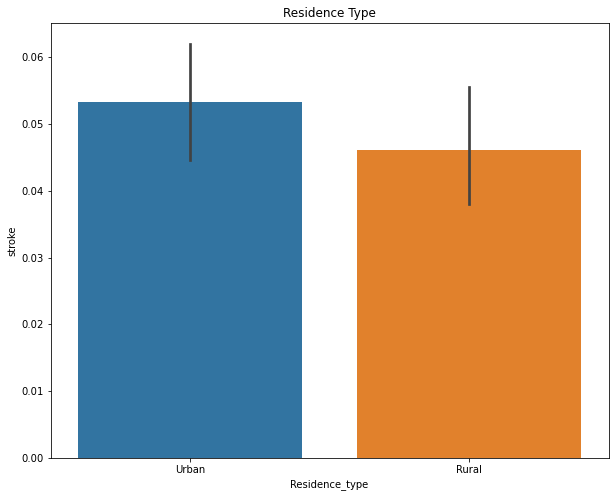

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x='Residence_type', y='stroke', data=df).set_title('Residence Type')

Text(0.5, 1.0, 'Glucose Level')

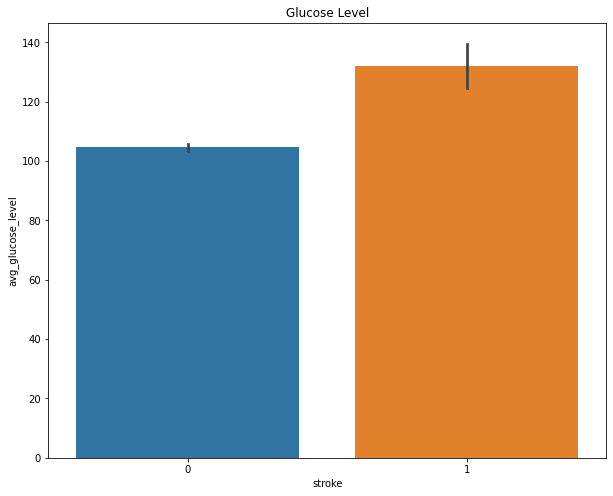

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='stroke', y='avg_glucose_level', data=df).set_title('Glucose Level')

Text(0.5, 1.0, 'BMI')

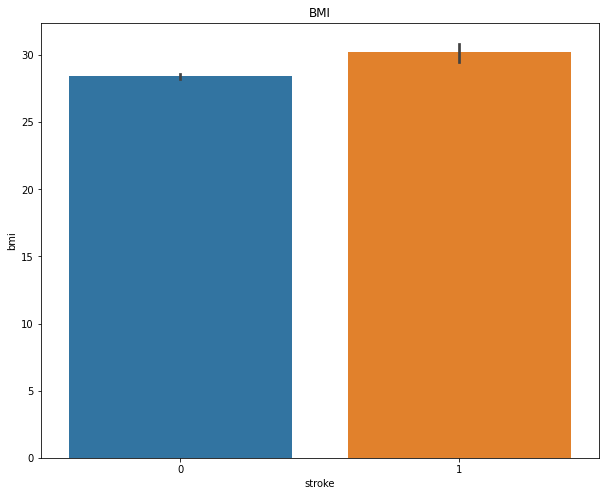

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x='stroke', y='bmi', data=df).set_title('BMI')

In [21]:
#sns.catplot(data=df, x="stroke", y="stroke", hue="Residence_type", kind="bar")

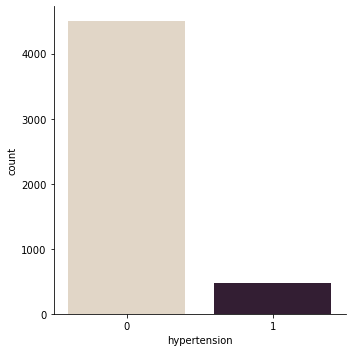

In [22]:
sns.catplot(data=df, x="hypertension", kind="count", palette="ch:.25")

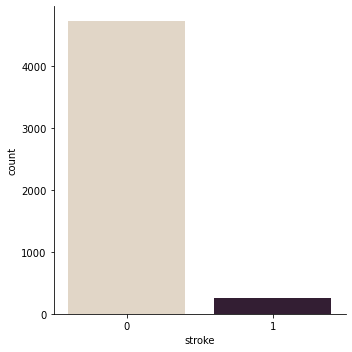

In [23]:
sns.catplot(data=df, x="stroke", kind="count", palette="ch:.25")

In [24]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Categorical Variables:
1. Gender
2. Ever Married
3. Work Type
4. Residence Type
5. Smoking Status

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Transform data jangan lupa
df[["gender", "ever_married", "work_type", "Residence_type","smoking_status"]] = df[["gender", "ever_married", "work_type", "Residence_type","smoking_status"]].apply(encoder.fit_transform)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [27]:
#split dataset in features and target variable
feature_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = df[feature_cols] # Features
y = df.stroke # Target variable

### Split Train & Test Variable

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


In [31]:
from PIL import Image 
import PIL 

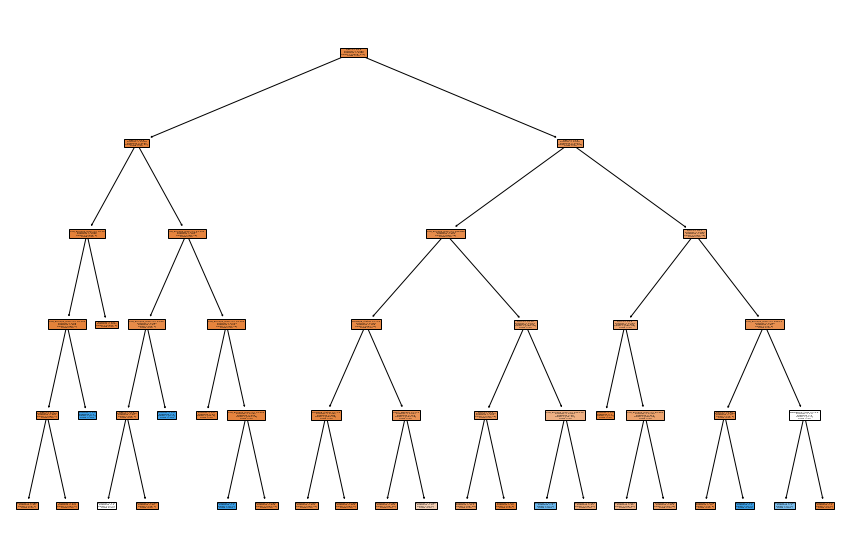

In [32]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(15, 10))
_ = plot_tree(clf, feature_names=X_train.columns, ax=ax, class_names=['no','yes'],filled=True)

In [33]:
#ax.savefig("decistion_tree.png")

#### Max Depth = 3

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.948494983277592


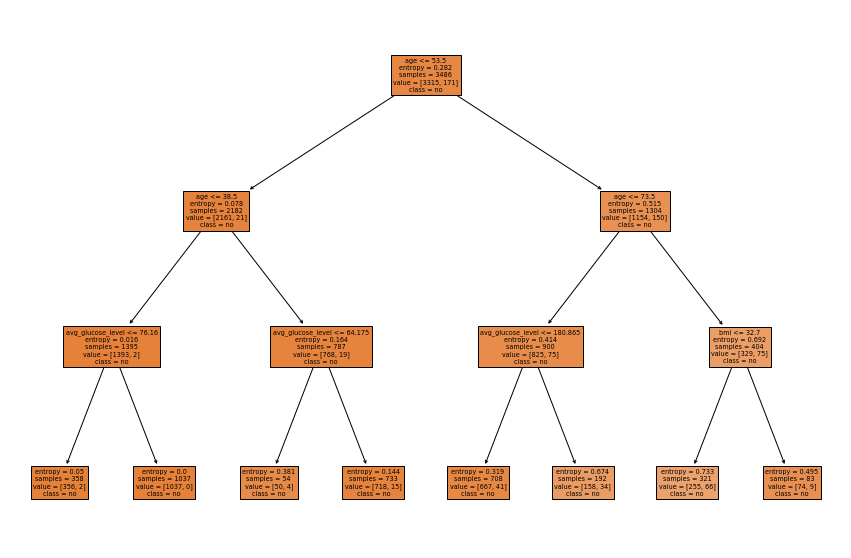

In [36]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(15, 10))
_ = plot_tree(clf, feature_names=X_train.columns, ax=ax, class_names=['no','yes'],filled=True)

#### Max Depth = 5

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=5,random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


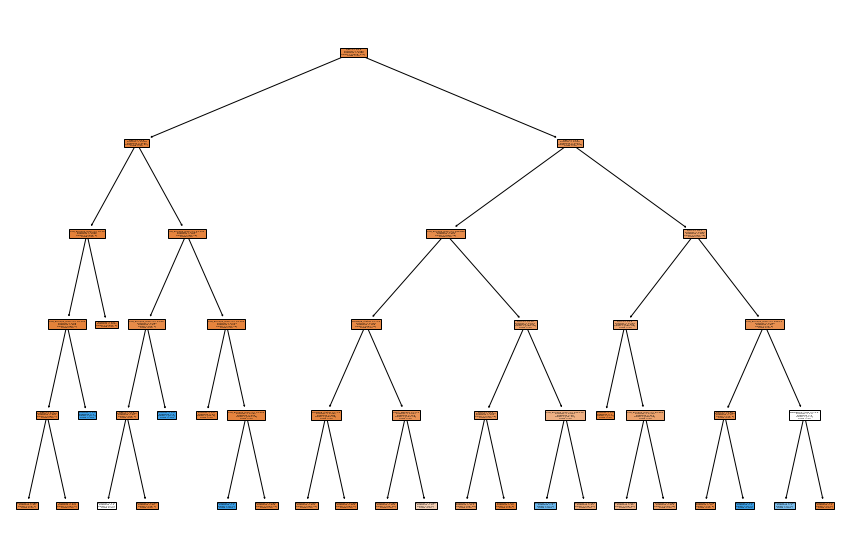

In [39]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(15, 10))
_ = plot_tree(clf, feature_names=X_train.columns, ax=ax, class_names=['no','yes'],filled=True)

In [40]:
1296*1296

1679616

#### Max Depth = 4

In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=4,random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


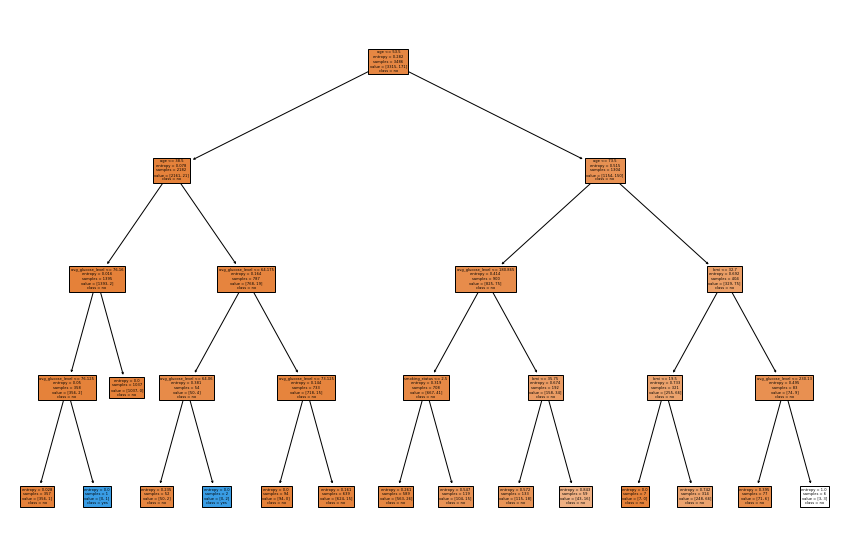

In [43]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(15, 10))
_ = plot_tree(clf, feature_names=X_train.columns, ax=ax, class_names=['no','yes'],filled=True)

#### Max Depth = No Max Depth and Using Pruning (ccp alpha = 0.01)

In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,ccp_alpha = 0.01)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.948494983277592


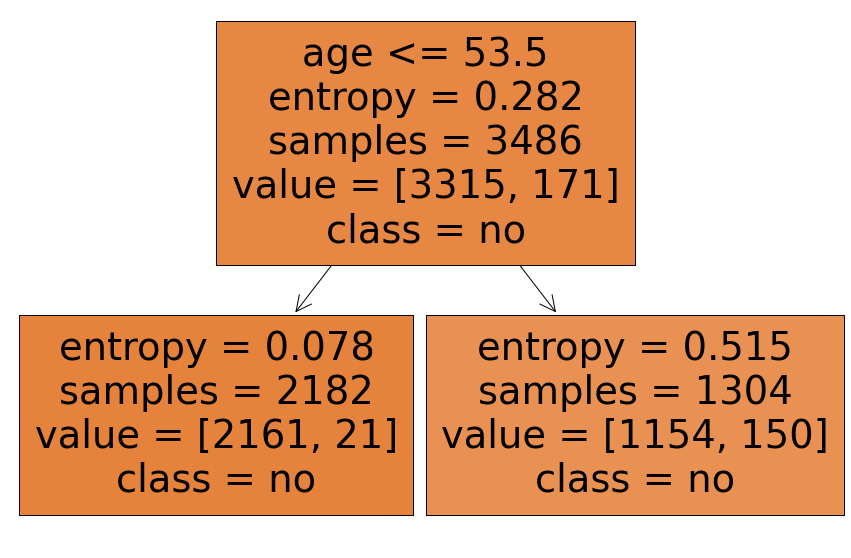

In [61]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(15, 10))
_ = plot_tree(clf, feature_names=X_train.columns, ax=ax, class_names=['no','yes'],filled=True)

#### Feature Importance

In [44]:
feature_names = X_train.columns

In [45]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)

In [46]:
feature_importance.rename(columns = {0: 'feature_importance'}, inplace=True)

In [47]:
feature_importance = feature_importance.sort_values(by = 'feature_importance', ascending = False)

In [48]:
feature_importance

,feature_importance
age,0.737824
avg_glucose_level,0.195678
bmi,0.037322
smoking_status,0.029176
gender,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000


<AxesSubplot:>

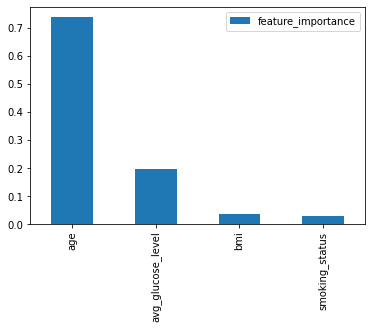

In [49]:
feature_importance.head(4).plot(kind = 'bar')

### Conclusion
1. Akurasi tertinggi yang dapat diperoleh adalah sebesar 94.8% dengan maximum depth sebesar 5
2. Kita telah mencoba menggunakan beberapa maximum depth dan pruning, namun hasil yang diperoleh tidak mampu memprediksi penyakit stroke, dan juga memiliki akurasi yang le